**INSTALL & IMPORT PACKAGES**

In [3]:
pip install openpyxl
pip install pmdarima

SyntaxError: invalid syntax (<ipython-input-3-7eaab217a644>, line 1)

In [4]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pmdarima import auto_arima
from datetime import date, timedelta

**IMPORT & CLEAN DATA**

In [5]:
#read data
df = pd.read_excel('EersteData.xlsx')

df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Start Date,2000-12-29 00:00:00,NaN,NaN
8,NaN,NaN,NaN,End Date,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD


In [6]:
#drop unnecessary blanks
df.drop(df.columns[:3], axis=1, inplace=True)
df.drop(df.index[:13], axis=0, inplace=True)
df.head(10)

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
13,NaN,100,NaN,NaN
14,2001-01-01 00:00:00,99.995,877.613,NaN
15,2001-01-02 00:00:00,97.602,866.1976,NaN
16,2001-01-03 00:00:00,99.782,879.6873,NaN
17,2001-01-04 00:00:00,100.061,885.8732,NaN
18,2001-01-05 00:00:00,98.131,878.9521,NaN
19,2001-01-08 00:00:00,97.966,877.6508,NaN
20,2001-01-09 00:00:00,98.477,877.3933,NaN
21,2001-01-10 00:00:00,98.592,877.6931,NaN
22,2001-01-11 00:00:00,98.485,881.8358,NaN


In [7]:
#add column names
df.columns = ['Date', 'MSCI AC World Index EUR Net', 'MSCI ACWI GDP Net Local', 'FTSE ALL WORLD']
df.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD
13,NaN,100,NaN,NaN
14,2001-01-01 00:00:00,99.995,877.613,NaN
15,2001-01-02 00:00:00,97.602,866.1976,NaN
16,2001-01-03 00:00:00,99.782,879.6873,NaN
17,2001-01-04 00:00:00,100.061,885.8732,NaN


In [8]:
#toevoegen eerste cel GDP want wilt niet readen voor een bepaalde reden?
df.iloc[0, 2] = 877.689

In [9]:
#making sure python recognizes date as date type
df['Date'] = pd.to_datetime(df['Date'])

#checking type
type(df['Date'])

pandas.core.series.Series

In [10]:
#add first date to make continuous (for ARIMA model later)
df.iloc[0,0] = df.iloc[1,0] - timedelta(days=1)

In [11]:
#reset index after slicing
df.reset_index(drop=True, inplace=True)

*New variable*

In [15]:
#MSCI GDP percentage change
df['PercentageChange'] = df['MSCI ACWI GDP Net Local'].pct_change() +1
df.loc[0, 'PercentageChange'] = 1

#create new column for MSCI GDP
df['MSCI ACWI GDP Net'] = np.nan
df.loc[0, 'MSCI ACWI GDP Net'] = 100

df.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD,PercentageChange,MSCI ACWI GDP Net
0,2000-12-31,100,877.689,NaN,1.000000,100.0
1,2001-01-01,99.995,877.613,NaN,0.999913,NaN
2,2001-01-02,97.602,866.1976,NaN,0.986993,NaN
3,2001-01-03,99.782,879.6873,NaN,1.015573,NaN
4,2001-01-04,100.061,885.8732,NaN,1.007032,NaN


In [16]:
#apply formula
for i in range(1, len(df)):
    df.loc[i, 'MSCI ACWI GDP Net'] = df.loc[i-1, 'MSCI ACWI GDP Net'] * df.loc[i, 'PercentageChange']
    
df.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net Local,FTSE ALL WORLD,PercentageChange,MSCI ACWI GDP Net
0,2000-12-31,100,877.689,NaN,1.000000,100.000000
1,2001-01-01,99.995,877.613,NaN,0.999913,99.991341
2,2001-01-02,97.602,866.1976,NaN,0.986993,98.690721
3,2001-01-03,99.782,879.6873,NaN,1.015573,100.227677
4,2001-01-04,100.061,885.8732,NaN,1.007032,100.932472


*Plotting*

In [17]:
#isolating relevant indices
df2 = df.loc[:,['Date', 'MSCI AC World Index EUR Net', 'MSCI ACWI GDP Net']]

df2.head()

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net
0,2000-12-31,100,100.000000
1,2001-01-01,99.995,99.991341
2,2001-01-02,97.602,98.690721
3,2001-01-03,99.782,100.227677
4,2001-01-04,100.061,100.932472


<AxesSubplot:xlabel='Date'>

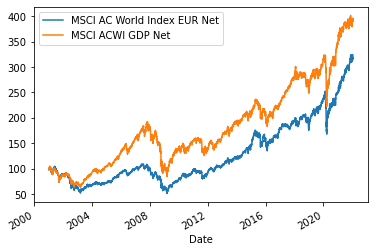

In [18]:
#plotting function
df2.set_index('Date', inplace=True)
df2.plot()

**ARIMA MODEL**

In [19]:
#reset index
df2.reset_index('Date', inplace=True)
df2

,Date,MSCI AC World Index EUR Net,MSCI ACWI GDP Net
0,2000-12-31,100,100.000000
1,2001-01-01,99.995,99.991341
2,2001-01-02,97.602,98.690721
3,2001-01-03,99.782,100.227677
4,2001-01-04,100.061,100.932472
...,...,...,...
5488,2022-01-12,319.385,396.069678
5489,2022-01-13,315.364,393.346618
5490,2022-01-14,315.151,391.645560
5491,2022-01-17,316.176,391.900776
